In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Standard plotly imports
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
import cufflinks
from plotly import tools
import plotly.graph_objs as go#visualization
# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)

# To interactive buttons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [2]:

df = pd.read_csv("/Users/nicholas/Google Drive/Nick/Jupyter Notebooks/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df.isnull().sum().values.sum()

0

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

In [9]:
#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

From the data, I see that a few columns that has the value no internet service and no as well.
I assuume that this means the customeer has no deviceprotection due to the lack of internet service
which is the same meaning as no. Hence, let's convert all no internet service into no as well

In [10]:
columns_to_be_replaced = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in columns_to_be_replaced : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
    

In [11]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
#defining all our columns
Id_col     = ['customerID']
metric_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() <= 4][df.nunique() > 2].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in metric_col]
bool_cols = df.nunique()[df.nunique() == 2].keys().tolist()
bool_cols = [x for x in bool_cols if x not in metric_col]
num_cols   = [x for x in df.columns if x not in cat_cols + metric_col + Id_col + bool_cols]

In [13]:
#defining data
trace = go.Pie(labels=df["Churn"].value_counts().keys().tolist(), 
                values=df["Churn"].value_counts().values.tolist(), 
                marker=dict(colors=['red']), 
                # Seting values to 
                hoverinfo="value"
              )
data = [trace]
#defining layout
layout = go.Layout(title="Churn Distribution")
#defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [14]:
#Separating churn and non churn customers
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
cat_cols

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

In [17]:
#all categorical columns and thier unique values
for i in cat_cols:
    for j in df[i].unique().tolist():
        print(i + ' unique values are ' + j)

MultipleLines unique values are No phone service
MultipleLines unique values are No
MultipleLines unique values are Yes
InternetService unique values are DSL
InternetService unique values are Fiber optic
InternetService unique values are No
Contract unique values are Month-to-month
Contract unique values are One year
Contract unique values are Two year
PaymentMethod unique values are Electronic check
PaymentMethod unique values are Mailed check
PaymentMethod unique values are Bank transfer (automatic)
PaymentMethod unique values are Credit card (automatic)


In [18]:
columns_to_be_replaced = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in columns_to_be_replaced : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

#defining all our columns
Id_col     = ['customerID']
metric_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() <= 4][df.nunique() > 2].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in metric_col]
bool_cols = df.nunique()[df.nunique() == 2].keys().tolist()
bool_cols = [x for x in bool_cols if x not in metric_col]
num_cols   = [x for x in df.columns if x not in cat_cols + metric_col + Id_col + bool_cols]

#Separating churn and non churn customers
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]

In [19]:
data = {}
for i in cat_cols:
    for j in df[i].unique().tolist():
        data[i + '_' + j] = go.Bar(
    x=['churn','not churn'],
    y=[(churn[i][churn[i] == j].value_counts().values.tolist()[0]/churn[i].value_counts().values.sum())*100,(not_churn[i][not_churn[i] == j].value_counts().values.tolist()[0]/not_churn[i].value_counts().values.sum())*100],
    name = j,width=0.4)
trace = list(data.keys())

            
       

In [20]:
layout = go.Layout(
    title = 'Distribution of Categorical Columns in customer attrition',
    barmode='stack',
    showlegend= False
)

# fig = go.Figure(data=data, layout=layout)
# fig = go.Figure(data=data, layout=layout)
fig = tools.make_subplots(rows=2, cols=2, subplot_titles = ('MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'))
fig.append_trace(data['MultipleLines_No phone service'], 1,1)
fig.append_trace(data['MultipleLines_No'], 1,1)
fig.append_trace(data['MultipleLines_Yes'], 1,1)
fig.append_trace(data['InternetService_DSL'], 1,2)
fig.append_trace(data['InternetService_Fiber optic'], 1,2)
fig.append_trace(data['InternetService_No'], 1,2)
fig.append_trace(data['Contract_Month-to-month'], 2,1)
fig.append_trace(data['Contract_One year'], 2,1)
fig.append_trace(data['Contract_Two year'], 2,1)
fig.append_trace(data['PaymentMethod_Electronic check'], 2,2)
fig.append_trace(data['PaymentMethod_Mailed check'], 2,2)
fig.append_trace(data['PaymentMethod_Bank transfer (automatic)'], 2,2)
fig.append_trace(data['PaymentMethod_Credit card (automatic)'], 2,2)
fig.layout.update(layout)
iplot(fig)

/usr/local/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



We can see that there are major differences in the distribution of each categorical column between churn and not churn customers. <br>

It is entirely obivous in the columns: <br>

Contract: Majority of churn customers are subscribed to a Month-to-month contract while the not churn customers share an equal distribution. This may indicate a product flaw in the month-to-month subscription. <br>

InternetService: Majority of churn customers are using Fiber optic internet service while the not churn customers share an equal distribution <br>

PaymentMethod: Majority of churn customers are paying using electronic check while the not churn customers share an equal distribution <br>

In [21]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
#Separating churn and non churn customers
churn     = df[df["Churn"] == "Yes"]
not_churn = df[df["Churn"] == "No"]
    

In [22]:
bool_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [23]:
#defining data
data = {}
for i in bool_cols:
    for j in df[i].unique().tolist():
        data[i + '_' + j] = go.Bar(
    x=['churn','not churn'],
    y=[(churn[i][churn[i] == j].value_counts().values.tolist()[0]/churn[i].value_counts().values.sum())*100,(not_churn[i][not_churn[i] == j].value_counts().values.tolist()[0]/not_churn[i].value_counts().values.sum())*100],
    name = j,width=0.4)
trace = list(data.keys())

#defining layout, fig and plotting
fig = tools.make_subplots(rows=4, cols=3, subplot_titles = ('Partner','SeniorCitizen','Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamTV','StreamingMovies','PaperlessBilling'))
fig.append_trace(data[trace[0]], 1,1)
fig.append_trace(data[trace[1]], 1,1)
fig.append_trace(data[trace[2]], 1,2)
fig.append_trace(data[trace[3]], 1,2)
fig.append_trace(data[trace[4]], 1,3)
fig.append_trace(data[trace[5]], 1,3)
fig.append_trace(data[trace[6]], 2,1)
fig.append_trace(data[trace[7]], 2,1)
fig.append_trace(data[trace[8]], 2,2)
fig.append_trace(data[trace[9]], 2,2)
fig.append_trace(data[trace[10]], 2,3)
fig.append_trace(data[trace[11]], 2,3)
fig.append_trace(data[trace[12]], 3,1)
fig.append_trace(data[trace[13]], 3,1)
fig.append_trace(data[trace[14]], 3,2)
fig.append_trace(data[trace[15]], 3,2)
fig.append_trace(data[trace[16]], 3,3)
fig.append_trace(data[trace[17]], 3,3)
fig.append_trace(data[trace[18]], 4,1)
fig.append_trace(data[trace[19]], 4,1)
fig.append_trace(data[trace[20]], 4,2)
fig.append_trace(data[trace[21]], 4,2)
fig.append_trace(data[trace[22]], 4,3)
fig.append_trace(data[trace[23]], 4,3)
fig.layout.update(layout)
iplot(fig)


Right away we can see that some columns have more obvious differences in their distributions between churn and not churn customers.<br> The obvious ones are <br>

Partner: Majority of churn customers are single while not churn customers have an equal distribution <br>

Dependents: Majority of churn customers does not have dependents, a similar distribution applies for not churn customers but the magnitude is lesser. This may just indicate that the majority of the telco's customers do not have dependents <br>

OnlineSecuirity: Majority of churn customers do not have online secuirity, a similar distribution applies for not churn customers but the magnitude is lesser. This may just indicate that the majority of the telco's customers do not have online secuirity. On the other hand, it makes sense for someone who does not have internet secuirity to have a higher probability to churn because he/she does not prioritize online activity thus the lack of online secuirity. <br>

OnlineBackup: Majority of churn customers do not have online secuirity, a similar distribution applies for not churn customers but the magnitude is lesser. This may just indicate that the majority of the telco's customers do not have online backup. However, just like online secuirity I suspect that customers who do not prioritize online activity do not subscribe to online services like online backup. Hence, they are more likely to churn. I will attempt to run a hypothesis test on this later on. <br>

TechSupport: Majority of churn customers do not have tech support from the telco, a similar distribution applies for not churn customers but the magnitude is lesser. This may just indicate that the majority of the telco's cusomters do not have tech support. However, it makes sense for a customer who does not have tech support to have a higher probability to churn due to the lack of support.  <br>

PaperlessBilling: Majority of churn customers have paperless billing while not churn customers have an equal distribution. This may be a flaw in the paperless billing feature from the telco. <br>

Let's explore our numerical columns now, taking a look at their distribution.

In [24]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [25]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [26]:
#defining data
trace1 = go.Histogram(x  = churn['tenure'],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = 1
                         ) 
    
trace2 = go.Histogram(x  = not_churn['tenure'],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .7
                     )
data = [trace1,trace2]

#defining layout
layout = go.Layout(dict(title ='tenure' + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = 'tenure',
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        )
                       ),barmode = 'overlay'
                  )

#defining figure and plotting
fig  = go.Figure(data=data,layout=layout)
iplot(fig)


Exploring the tenure distribution, we see that there is a skewed distribution for churn customers.
<br>About 40% of churn customers have a 1-5 month tenure with the telco.<br>
The distribution for non-churn customers is fairly uniform.


In [27]:
#defining data
trace1 = go.Histogram(x  = churn['MonthlyCharges'],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = 1
                         ) 


trace2 = go.Histogram(x  = not_churn['MonthlyCharges'],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .7
                     )
data = [trace1,trace2]

#defining layout
layout = go.Layout(dict(title ='MonthlyCharges' + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = 'monthlycharges',
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=1
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "monthlycharges",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=1
                                        )
                       ),barmode = 'overlay'
                  )

#defining figure and plotting
fig  = go.Figure(data=data,layout=layout)
iplot(fig)


Exploring the monthlycharges distribution, we can see that a majority of churned customers spent between 70 and 105.
A majority(about 30%) of non churn customers spent between 15 and 30.

In [28]:
#defining data
trace1 = go.Histogram(x  = churn['TotalCharges'],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = 1
                         ) 


trace2 = go.Histogram(x  = not_churn['TotalCharges'],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .7
                     )
data = [trace1,trace2]

#defining layout
layout = go.Layout(dict(title ='TotalCharges' + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = 'TotalCharges',
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=1
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "TotalCharges",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=1
                                        )
                       ),barmode = 'overlay'
                  )

#defining figure and plotting
fig  = go.Figure(data=data,layout=layout)
iplot(fig)


Exploring the TotalCharges distribution, about 40% of churn customers spend less than 400.
<br>The distribution of non-churn customers is quite uniform having about 50% spending less than 1800.

It would definitely make sense for churn customers to have a lower total charge because they had left the company. 
But what about the monthly charge? We can take a look at that.
At the same time, we can see if there's a relationship between monthly charge and tenure.

In [29]:
#defining data
trace1 = go.Scatter(x=churn['MonthlyCharges'],y=churn['tenure'],mode = "markers",marker = dict(line = dict(color = "blue"),
                                                                   size=churn['TotalCharges']/180,
                                                        color = 'blue',
                                                      
                                                      ),
                        opacity = .9
                       ,name='churn',showlegend=True)

trace2 = go.Scatter(x=not_churn['MonthlyCharges'],y=not_churn['tenure'],mode = "markers",marker = dict(line = dict(color = "red"),
                                                                   size=not_churn['TotalCharges']/180,
                                                       color = 'red',
                                                      
                                                      ),
                        opacity = 0.5
                       ,name='not_churn',showlegend=True)
data = [trace1, trace2]
                       
#defining layout
layout = go.Layout(dict(title = 'Monthly Charges vs Tenure (radius = total charges)',
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "tenure",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )

#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)

In [30]:
#defining all our columns
Id_col     = ['customerID']
metric_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() <= 4][df.nunique() > 2].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in metric_col]
bool_cols = df.nunique()[df.nunique() == 2].keys().tolist()
bool_cols = [x for x in bool_cols if x not in metric_col]
num_cols   = [x for x in df.columns if x not in cat_cols + metric_col + Id_col + bool_cols]

In [31]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
bool_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

In [33]:
from sklearn.preprocessing import LabelEncoder
#Label encoding bool_cols
le = LabelEncoder()
for i in bool_cols :
    df[i] = le.fit_transform(df[i])

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Label encoding bool_cols
le = LabelEncoder()
for i in bool_cols :
    df[i] = le.fit_transform(df[i])
    
for i in metric_col :
    df[i] = le.fit_transform(df[i])

    
#Duplicating columns for cat_cols
df = pd.get_dummies(data = df,columns = cat_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_original = df.copy()
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(scaled,left_index=True,right_index=True,how = "left")


In [35]:
df['Churn'] = le.fit_transform(df['Churn'])

In [36]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [37]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Magma",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

We will perform a simple logistic regression on all the features available on the dataset. <br>
After that, we can optimise our model by selecting top features to include in our model.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [39]:
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)

In [40]:
##seperating dependent and independent variables
cols    = [i for i in df.columns if i not in Id_col + metric_col]
train_X = train[cols]
train_Y = train[metric_col]
test_X  = test[cols]
test_Y  = test[metric_col]

In [41]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logit.fit(train_X,train_Y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [43]:
predictions = logit.predict(test_X)

In [44]:
probabilities = logit.predict_proba(test_X)

In [45]:
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1268
           1       0.68      0.54      0.60       490

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758



In [46]:
print ("Accuracy   Score : ",accuracy_score(test_Y,predictions))

Accuracy   Score :  0.8003412969283277


In [47]:
#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
conf_matrix

array([[1144,  124],
       [ 227,  263]])

In [48]:
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

Area under curve :  0.7194714478851477 



In [49]:
coefficients  = pd.DataFrame(logit.coef_.ravel())
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

In [50]:
#plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                name = "coefficients",
                marker = dict(color = coef_sumry["coefficients"],
                              colorscale = "Picnic",
                              line = dict(width = .6,color = "black")))

layout = go.Layout(dict(title = "Feature Importances",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin = dict(b = 195),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                       )
                  )
# fig['layout'].update(showlegend=False, title="Feature Importances" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
fig["layout"]["xaxis"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))

#defining figure and plotting
fig = go.Figure(trace4,layout=layout)
iplot(fig)

In [74]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 700,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated

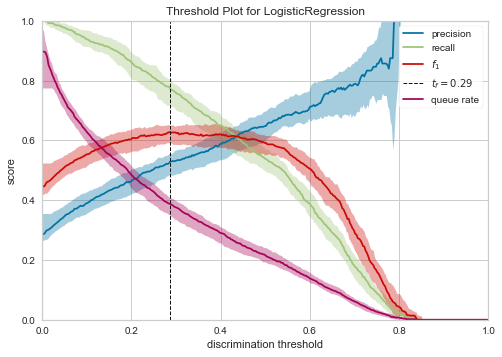

In [52]:
visualizer = DiscriminationThreshold(logit)
visualizer.fit(train_X,train_Y)
visualizer.poof()

From the classification report, we can observe that our model is good at predicting class 0 , which are customers who stayed. <br>

Our model is not good at predicting class 1, which are customers who churned. <br>

This may be a problem as the purpose here is to identify potential customers who are going to churn. <br>

This problem may be caused by an imbalanced sample in our dataset. Our dataset contains more customers who stayed than customers who churn. <br>

We can see that from the first graph we plotted. In our dataset, 74% of customers had stayed with the telco while the remaining are customers who churned. Hence, the trained model is biased towards predicting customers who stayed due to this. We can solve this by several resampling methods. <br>

One of the methods is called SMOTE.

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

cols    = [i for i in df.columns if i not in Id_col+metric_col]

smote_X = df[cols]
smote_Y = df[metric_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X.to_numpy(),smote_train_Y.to_numpy())
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=metric_col)

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [54]:
os_smote_X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,0.000000,1.0,0.0,1.000000,1.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.139417,0.698109,0.069244
1,0.0,0.0,0.0,0.000000,1.0,1.0,1.000000,0.0,1.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.327365,0.832733,1.571223
2,0.0,1.0,0.0,0.000000,1.0,0.0,1.000000,1.0,0.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.035784,0.005046,-0.789571
3,0.0,0.0,1.0,0.000000,1.0,1.0,0.000000,1.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.117272,0.801154,-0.806998
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.268022,-0.466969,-0.119959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,1.0,0.0,1.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.145040,0.172473,-0.879992
7786,1.0,1.0,1.0,0.000000,1.0,0.0,0.619225,0.0,0.000000,1.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.099248,1.028467,0.453071
7787,1.0,0.0,0.0,0.106579,1.0,1.0,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.280248,-0.532835,-0.985847
7788,1.0,0.0,0.0,0.000000,1.0,0.0,1.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.010676,0.556044,-0.729647


In [55]:
logit_smote  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
logit_smote.fit(os_smote_X,os_smote_Y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
predictions   = logit_smote.predict(smote_test_X)
probabilities = logit_smote.predict_proba(smote_test_X)

In [58]:
print(classification_report(smote_test_Y,predictions))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1268
           1       0.55      0.79      0.65       490

    accuracy                           0.76      1758
   macro avg       0.73      0.77      0.73      1758
weighted avg       0.80      0.76      0.77      1758



In [59]:
#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
conf_matrix

array([[950, 318],
       [103, 387]])

In [60]:
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

Area under curve :  0.769503637417112 



In [61]:
coefficients  = pd.DataFrame(logit_smote.coef_.ravel())
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

In [62]:
#plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                name = "coefficients",
                marker = dict(color = coef_sumry["coefficients"],
                              colorscale = "Picnic",
                              line = dict(width = .6,color = "black")))

layout = go.Layout(dict(title = "Feature Importances",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin = dict(b = 195),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                       )
                  )
# fig['layout'].update(showlegend=False, title="Feature Importances" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
fig["layout"]["xaxis"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))

#defining figure and plotting
fig = go.Figure(trace4,layout=layout)
iplot(fig)

In [63]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 900,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated

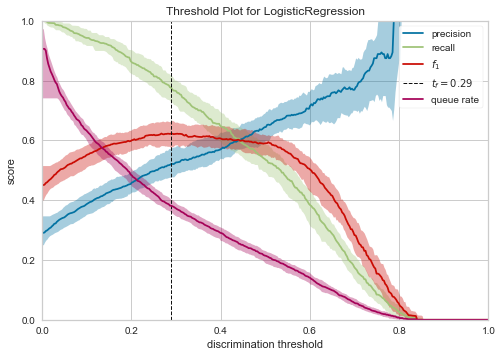

In [64]:
visualizer = DiscriminationThreshold(logit_smote)
visualizer.fit(smote_train_X,smote_train_Y)
visualizer.poof()

we see that we had achieved more are under the roc curve. We will keep these results for now.

In [65]:
logit.coef_

array([[-0.08213958,  0.20000396, -0.01154426, -0.14636436, -0.51374332,
        -0.49066744, -0.23504491, -0.08512688, -0.36453226,  0.08588596,
         0.17244732,  0.36520776, -0.40398333, -0.14398567, -0.10975998,
        -0.2384659 ,  0.27759992, -0.69686301,  0.4455179 , -0.20538317,
        -0.89786371, -0.17884266, -0.31949348,  0.07268644, -0.23207928,
        -1.38107532,  0.29828173,  0.62192566]])

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
rfe = RFE(log,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())
#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in df.columns if i not in Id_col + metric_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

In [67]:
cols

['OnlineSecurity',
 'TechSupport',
 'PaperlessBilling',
 'MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_Two year',
 'tenure',
 'TotalCharges']

In [68]:
import plotly.figure_factory as ff
tab_rk = ff.create_table(idc_rfe)
iplot(tab_rk)

In [69]:
#separating train and test data SMOTE
train_rf_X_smote = os_smote_X[cols]
train_rf_Y_smote = os_smote_Y
test_rf_X_smote  = test[cols]
test_rf_Y_smote  = test[metric_col]

#separating train and test data Original
train_rf_X = train_X[cols]
train_rf_Y = train_Y
test_rf_X = test_X[cols]
test_rf_Y = test_Y
logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#training for dataset without smote
logit_ori_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logit_ori_rfe.fit(train_rf_X,train_rf_Y)





/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [73]:
#training for dataset with smote
logit_smote_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logit_smote_rfe.fit(train_rf_X_smote,train_rf_Y_smote)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [78]:
predictions   = logit_ori_rfe.predict(test_rf_X)
probabilities = logit_ori_rfe.predict_proba(test_rf_X)

print(classification_report(test_rf_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_rf_Y,predictions)
conf_matrix

#roc_auc_score
model_roc_auc = roc_auc_score(test_rf_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_rf_Y,probabilities[:,1])

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1268
           1       0.69      0.56      0.62       490

    accuracy                           0.81      1758
   macro avg       0.77      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758

Area under curve :  0.7312528165840468 



In [79]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 700,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



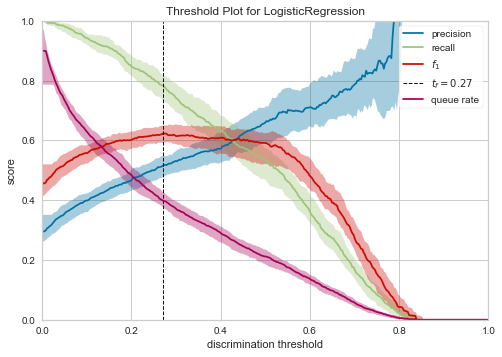

In [80]:
visualizer = DiscriminationThreshold(logit_ori_rfe)
visualizer.fit(train_X,train_Y)
visualizer.poof()

In [81]:
predictions   = logit_smote_rfe.predict(train_rf_X_smote)
probabilities = logit_smote_rfe.predict_proba(train_rf_X_smote)

print(classification_report(train_rf_Y_smote,predictions))

#confusion matrix
conf_matrix = confusion_matrix(train_rf_Y_smote,predictions)
conf_matrix

#roc_auc_score
model_roc_auc = roc_auc_score(train_rf_Y_smote,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(train_rf_Y_smote,probabilities[:,1])

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3895
           1       0.75      0.83      0.78      3895

    accuracy                           0.77      7790
   macro avg       0.78      0.77      0.77      7790
weighted avg       0.78      0.77      0.77      7790

Area under curve :  0.772785622593068 



In [82]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 700,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

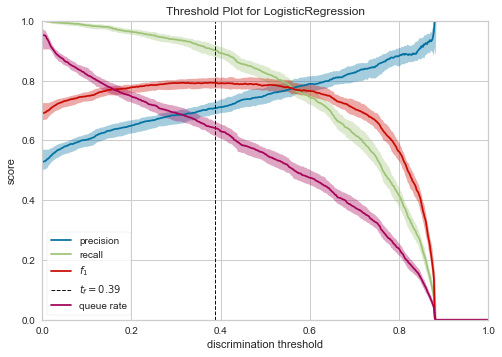

In [83]:
visualizer = DiscriminationThreshold(logit_smote_rfe)
visualizer.fit(train_rf_X_smote,train_rf_Y_smote)
visualizer.poof()

In [71]:
logit_rfe.fit(train_rf_X,train_rf_Y)
predictions   = logit_rfe.predict(test_rf_X)
probabilities = logit_rfe.predict_proba(test_rf_X)

print(classification_report(test_rf_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_rf_Y,predictions)
conf_matrix

#roc_auc_score
model_roc_auc = roc_auc_score(test_rf_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_rf_Y,probabilities[:,1])

coefficients  = pd.DataFrame(logit_rfe.coef_.ravel())
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1268
           1       0.69      0.56      0.62       490

    accuracy                           0.81      1758
   macro avg       0.77      0.73      0.75      1758
weighted avg       0.80      0.81      0.80      1758

Area under curve :  0.7312528165840468 



/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [67]:
#plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                name = "coefficients",
                marker = dict(color = coef_sumry["coefficients"],
                              colorscale = "Picnic",
                              line = dict(width = .6,color = "black")))

layout = go.Layout(dict(title = "Feature Importances",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin = dict(b = 195),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                       )
                  )
# fig['layout'].update(showlegend=False, title="Feature Importances" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
fig["layout"]["xaxis"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))

#defining figure and plotting
fig = go.Figure(trace4,layout=layout)
iplot(fig)

In [68]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 900,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



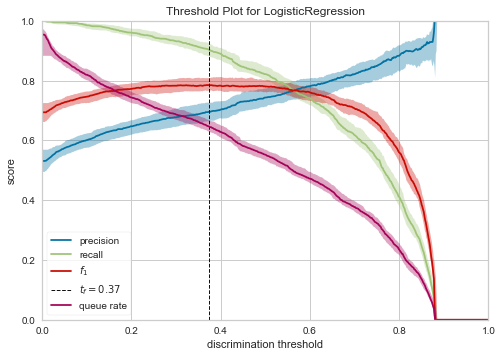

In [69]:
visualizer = DiscriminationThreshold(logit_rfe)
visualizer.fit(train_rf_X,train_rf_Y)
visualizer.poof()

In [70]:
import plotly.figure_factory as ff
tab_rk = ff.create_table(idc_rfe)
iplot(tab_rk)

In [71]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in df.columns if i not in Id_col + metric_col ]

#dataframe with non negative values
df_x = df_original[cols]
df_y = df[metric_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

scores
[2.54297062e-01 1.33482766e+02 8.18577694e+01 1.31271509e+02
 9.29483891e-02 1.47165601e+02 3.12098318e+01 2.02160070e+01
 1.35439602e+02 1.73206148e+01 1.59306111e+01 1.04979224e+02
 3.88864216e+00 8.68247305e-01 6.51465136e+00 7.11376111e+01
 3.72082851e+02 2.85475152e+02 5.16714004e+02 1.76608724e+02
 4.86223101e+02 7.66190658e+01 9.99725387e+01 4.24113152e+02
 4.47251434e+01 1.63773281e+04 3.65307468e+03 6.29630810e+05]
P - Values
[6.14065505e-001 7.08954608e-031 1.46240915e-019 2.15953960e-030
 7.60461827e-001 7.21988253e-034 2.31590182e-008 6.91717063e-006
 2.64595220e-031 3.15742928e-005 6.57073922e-005 1.23423173e-024
 4.86137123e-002 3.51440986e-001 1.06989295e-002 3.33158163e-017
 6.58713045e-083 4.81399951e-064 2.19511926e-114 2.66631661e-040
 9.45428638e-108 2.07328356e-018 1.54524820e-023 3.10584857e-094
 2.26727030e-011 0.00000000e+000 0.00000000e+000 0.00000000e+000]


In [72]:
#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)
score

,features,scores,p_values
27,TotalCharges,629630.810349,0.000000e+00
25,tenure,16377.328093,0.000000e+00
26,MonthlyCharges,3653.074681,0.000000e+00
18,Contract_Month-to-month,516.714004,2.195119e-114
20,Contract_Two year,486.223101,9.454286e-108
23,PaymentMethod_Electronic check,424.113152,3.105849e-94
16,InternetService_Fiber optic,372.082851,6.587130e-83
17,InternetService_No,285.475152,4.814000e-64
19,Contract_One year,176.608724,2.666317e-40
5,OnlineSecurity,147.165601,7.219883e-34


In [73]:
#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

In [74]:
#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 2 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:2].tolist()

In [76]:
test_Y = test_Y.astype(int)

In [77]:
df_y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [78]:
# def plot_decision_tree(columns,maximum_depth,criterion_type,
#                        split_type,model_performance = None) :
    
#separating dependent and in dependent variables
dtc_x = df_x[features_num]
dtc_y = df_y[metric_col]

#model
dt_classifier = DecisionTreeClassifier(max_depth = 3,
                                       splitter  = 'best',
                                       criterion = 'gini',
                                      )
dt_classifier.fit(dtc_x,dtc_y)


predictions   = dt_classifier.predict(test_X[features_num])
probabilities = dt_classifier.predict_proba(test_X[features_num])

print(classification_report(test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
conf_matrix

    
#     #plot decision tree
#     graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
#                                         rounded=True,proportion = False,
#                                         feature_names = columns, 
#                                         precision  = 2,
#                                         class_names=["Not churn","Churn"],
#                                         filled = True                         
#                                        )
#                   )
    
#     #model performance
#     if model_performance == True :
#         telecom_churn_prediction(dt_classifier,
#                                  dtc_x,test_X[columns],
#                                  dtc_y,test_Y,
#                                  columns,"features",threshold_plot = True)
#     display(graph)
    
# plot_decision_tree(features_num,3,"gini","best")

              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1268
           1       0.00      0.00      0.00       490

    accuracy                           0.72      1758
   macro avg       0.36      0.50      0.42      1758
weighted avg       0.52      0.72      0.60      1758



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



array([[1268,    0],
       [ 490,    0]])

In [93]:
features_cat

['Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'OnlineSecurity',
 'TechSupport',
 'SeniorCitizen',
 'Dependents']

In [95]:
# def plot_decision_tree(columns,maximum_depth,criterion_type,
#                        split_type,model_performance = None) :
    
#separating dependent and in dependent variables
dtc_x = df_x[features_cat]
dtc_y = df_y[metric_col]

#model
dt_classifier = DecisionTreeClassifier(max_depth = 3,
                                       splitter  = 'best',
                                       criterion = 'gini',
                                      )
dt_classifier.fit(dtc_x,dtc_y)


predictions   = dt_classifier.predict(test_X[features_cat])
probabilities = dt_classifier.predict_proba(test_X[features_cat])

print(classification_report(test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
conf_matrix

    
#     #plot decision tree
#     graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
#                                         rounded=True,proportion = False,
#                                         feature_names = columns, 
#                                         precision  = 2,
#                                         class_names=["Not churn","Churn"],
#                                         filled = True                         
#                                        )
#                   )
    
#     #model performance
#     if model_performance == True :
#         telecom_churn_prediction(dt_classifier,
#                                  dtc_x,test_X[columns],
#                                  dtc_y,test_Y,
#                                  columns,"features",threshold_plot = True)
#     display(graph)
    
# plot_decision_tree(features_num,3,"gini","best")

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1268
           1       0.58      0.54      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.76      0.76      0.76      1758



array([[1071,  197],
       [ 223,  267]])

In [96]:
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

coefficients  = pd.DataFrame(dt_classifier.feature_importances_)
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)



Area under curve :  0.6947675915792185 



In [97]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 900,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


In [98]:
#plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                name = "coefficients",
                marker = dict(color = coef_sumry["coefficients"],
                              colorscale = "Picnic",
                              line = dict(width = .6,color = "black")))

layout = go.Layout(dict(title = "Feature Importances",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin = dict(b = 195),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                       )
                  )
# fig['layout'].update(showlegend=False, title="Feature Importances" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
fig["layout"]["xaxis"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))

#defining figure and plotting
fig = go.Figure(trace4,layout=layout)
iplot(fig)

In [80]:
#top 7 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:10].tolist()

In [81]:
features_cat

['Contract_Month-to-month',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'OnlineSecurity',
 'TechSupport',
 'SeniorCitizen',
 'Dependents']

In [82]:
# def plot_decision_tree(columns,maximum_depth,criterion_type,
#                        split_type,model_performance = None) :
    
#separating dependent and in dependent variables
dtc_x = df_x[features_cat]
dtc_y = df_y[metric_col]

#model
dt_classifier = DecisionTreeClassifier(max_depth = 3,
                                       splitter  = 'best',
                                       criterion = 'gini',
                                      )
dt_classifier.fit(dtc_x,dtc_y)


predictions   = dt_classifier.predict(test_X[features_cat])
probabilities = dt_classifier.predict_proba(test_X[features_cat])

print(classification_report(test_Y,predictions))

#confusion matrix
conf_matrix = confusion_matrix(test_Y,predictions)
conf_matrix

    
#     #plot decision tree
#     graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
#                                         rounded=True,proportion = False,
#                                         feature_names = columns, 
#                                         precision  = 2,
#                                         class_names=["Not churn","Churn"],
#                                         filled = True                         
#                                        )
#                   )
    
#     #model performance
#     if model_performance == True :
#         telecom_churn_prediction(dt_classifier,
#                                  dtc_x,test_X[columns],
#                                  dtc_y,test_Y,
#                                  columns,"features",threshold_plot = True)
#     display(graph)
    
# plot_decision_tree(features_num,3,"gini","best")

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1268
           1       0.58      0.53      0.56       490

    accuracy                           0.76      1758
   macro avg       0.70      0.69      0.70      1758
weighted avg       0.76      0.76      0.76      1758



array([[1081,  187],
       [ 229,  261]])

In [87]:
#roc_auc_score
model_roc_auc = roc_auc_score(test_Y,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])

coefficients  = pd.DataFrame(dt_classifier.feature_importances_)
column_df     = pd.DataFrame(cols)
coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                          right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)



Area under curve :  0.6925883602652417 



In [86]:
#plot roc curve
trace2 = go.Scatter(x = fpr,y = tpr,
                    name = "Roc : " + str(model_roc_auc),
                    line = dict(color = ('rgb(22, 96, 167)'),width = 2))
trace3 = go.Scatter(x = [0,1],y=[0,1],
                    line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                    dash = 'dot'))

data = [trace2,trace3]

layout = go.Layout(dict(title = "Receiver operating characteristic",
                        autosize = False,
                        height = 900,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195),
                        xaxis = dict(title = "false positive rate"),
                        yaxis = dict(title = "true positive rate"),
                       )
                  )
# fig['layout'].update(showlegend=False, title="Receiver operating characteristic" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
# fig["layout"]["xaxis"].update(dict(title = "false positive rate"))
# fig["layout"]["yaxis"].update(dict(title = "true positive rate"))
#defining figure and plotting
fig = go.Figure(data,layout=layout)
iplot(fig)


In [88]:
#plot coeffs
trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                name = "coefficients",
                marker = dict(color = coef_sumry["coefficients"],
                              colorscale = "Picnic",
                              line = dict(width = .6,color = "black")))

layout = go.Layout(dict(title = "Feature Importances",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin = dict(b = 195),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                       )
                  )
# fig['layout'].update(showlegend=False, title="Feature Importances" ,
#                          autosize = True,
#                          plot_bgcolor = 'rgba(240,240,240, 0.95)',
#                          paper_bgcolor = 'rgba(240,240,240, 0.95)',
#                          margin = dict(b = 195))
fig["layout"]["xaxis"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))

#defining figure and plotting
fig = go.Figure(trace4,layout=layout)
iplot(fig)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

NameError: name 'telcom' is not defined